
# Analysis Of TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#load">Loading The Data</a></li>
<li><a href="#wrangling">Data Wrangling</a>
     <ul>
            <li><a href="#drop_null">Drop Null Values</a></li>
            <li><a href="#drop_duplicate">Drop Duplicates</a></li>
            <li><a href="#clean_datatype">Clean Data Types</a></li>
     </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a>
    <ul>
            <li><a href="#Expolre_relationships">Explore Relationship Between Different Variables</a></li>
            <li><a href="#Answer_question">Answer Questions</a></li>
    </ul>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>  Analysing a Dataset of about 10,000 movies collected from The Movies Database starting from year 1961 - 2015.

### Question(s) for Analysis
> How a movies budget affects its Revenue

> How does popularity of a movie contribute to the succces or failer of the movies. 

<a id="import"></a>
# Importing Modules
The modules required to analyse the data are: `pandas`, `numpy`, `matplotlib`, and `seaborn`.

In [32]:
#importing the neccesary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id="load"></a>
# Loading the Dataset

In [33]:
# a function to load the data to be used for analysis

def open_a_csv(filename):
    
    """ A function tha reads 
    data from a csv file
    loads it into a dataframe
    """

    data = pd.read_csv(filename)

    return data

file_name = 'tmdb-movies.csv'
df = open_a_csv(filename=file_name)
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Describing The Data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## The dataset have the following attributes
  
 - **Rows**: 10866
 - **Columns**: 21
 - **Column Names**:       
   - id
   - imdb_id
   - popularity
   - budget
   - revenue
   - original_title
   - cast
   - homepage: Movie website homepage
   - director
   - tagline 
   - keywords 
   - overview
   - runtime
   - genres
   - production_companies
   - release_date
   - vote_count
   - vote_average
   - release_year
   - budget_adj
   - revenue_adj

<a id='wrangling'></a>
## Data Wrangling



### Data Cleaning
  - **checking null values**
  - **checking duplicated values**

In [35]:
#Cheking for null values

def check_null(dataframe):

    """A functin to check
    columns with null values.    
    """

    data = dataframe.isnull().any()

    return data

check_null(df).sum()

9

# Dropping Null Values

In [36]:
df.dropna(axis=0, inplace=True)
df.shape

(1992, 21)

- **checking for null values again**

In [37]:
check_null(df).sum()

0

In [38]:
#Cheking for duplicate values
df.duplicated().sum()

0

# Dropping Unnecessary Columns

- Dropping columns which aren't needed in our analysis
- The columns dropped are: `homepage`, `tagline`, `keywords`, `imdb_id`, `overview`, `budget_adj`, `revenue_adj`

In [39]:
df.drop(columns=['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], inplace=True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

# Checking Data Types
 - cheking the data's data types to see if any data type coversion is necessary

In [40]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

- The Realease date column data type is an object so we are gonna change it to datetime data type

In [41]:
# Replace the year part with the `release_year` column
df.release_date = df.apply(lambda x: x.release_date[:-2] + str(x.release_year), axis=1)

# Converting the datatype
df.release_date = pd.to_datetime(df.release_date)

In [42]:
df.release_date

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
5       2015-12-25
6       2015-06-23
7       2015-09-30
8       2015-06-17
9       2015-06-09
10      2015-10-26
11      2015-02-04
12      2015-01-21
13      2015-07-16
14      2015-04-22
15      2015-12-25
16      2015-01-01
17      2015-07-14
19      2015-11-18
20      2015-05-19
22      2015-05-27
23      2015-02-11
24      2015-12-11
25      2015-07-23
27      2015-01-24
28      2015-11-06
29      2015-09-09
30      2015-06-19
31      2015-03-04
34      2015-08-05
           ...    
9992    1990-03-02
10012   1990-05-18
10078   1990-09-07
10094   1990-11-09
10131   1961-12-15
10190   1976-11-05
10213   1976-11-05
10222   1993-11-29
10223   1993-06-11
10224   1993-10-08
10238   1993-12-17
10251   1993-11-11
10255   1993-09-01
10317   1993-01-15
10328   1993-08-07
10338   1993-07-23
10372   1993-10-01
10401   1967-06-12
10438   1963-10-11
10489   1986-05-30
10567   1986-08-29
10594   1973

<a id='eda'></a>
# Exploratory Data Analysis

### Explore the Data to see all the data sets

In [43]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000


In [44]:
#checkijng for bugdet columns with zero values
sum(df.budget == 0)

#dropping budget rows with zero values
df = df[df.budget != 0]

In [45]:
#checking budget rows to see if the rows with zero values have been dropped
sum(df.budget == 0)

0

In [46]:
#Replacing zero values in runtime column with mean
runtime_col = df['runtime']
runtime_col.replace(to_replace = 0, value = runtime_col.mean(), inplace=True)

In [47]:
#checking runtime rows to see if the rows with zero values have been replaced with mean values
sum(df.runtime == 0)

0

In [48]:
#Replacing zero values in revenue column with mean
revenue_col = df['revenue']
revenue_col.replace(to_replace = 0, value = revenue_col.mean(), inplace=True)

In [49]:
#checking revenue rows to see if the rows with zero values have been replaced with mean values
sum(df.revenue == 0)

0

 - **lets have a look at the data again to see there are no 0 values**

In [50]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1446.000000,1446.000000,1.446000e+03,1.446000e+03,1446.000000,1446.000000,1446.000000,1446.000000
mean,56528.937068,1.645021,4.759480e+07,1.741135e+08,109.588183,855.459889,6.226072,2007.230982
std,78471.732291,2.092793,5.393600e+07,2.395213e+08,23.667945,1214.378903,0.832741,7.875891
min,11.000000,0.007487,1.000000e+00,4.300000e+01,10.000000,10.000000,2.200000,1961.000000
25%,7525.000000,0.568599,1.000000e+07,3.139215e+07,95.000000,125.250000,5.700000,2006.000000
50%,22822.500000,1.056062,3.000000e+07,1.016917e+08,106.000000,373.500000,6.250000,2009.000000
75%,68557.750000,1.953823,6.500000e+07,1.875963e+08,119.000000,1059.000000,6.800000,2012.000000
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.300000,2015.000000


### Research question 1 (How the movie budget affects revenue collected)

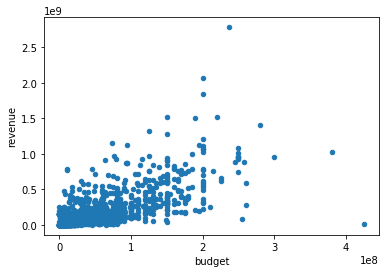

In [51]:
#comparison between a movies budget and the generated revenue
df.plot(x = 'budget', y = 'revenue', kind = 'scatter');

- **The movies budget seems to have a positive corelation with the revenue**

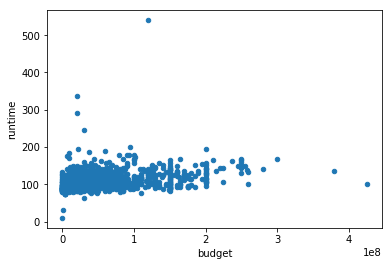

In [52]:
#comparison between a movies budget and the runtime
df.plot(x = 'budget', y = 'runtime', kind = 'scatter');

- **Comparison between a movies bugdet and how long the movie runs shows a normal distribution, so a movies budget does not greatly affect the run time of a movie**

### Research Question 2  (Does popularity affect the  success or failure of a movie with regards to the revenue collected)

In [53]:
#describing the popluar columns and getting popluar movies
df.popularity.describe()

count    1446.000000
mean        1.645021
std         2.092793
min         0.007487
25%         0.568599
50%         1.056062
75%         1.953823
max        32.985763
Name: popularity, dtype: float64

In [54]:
#popular movies
popular = df[df.popularity >= 1.953823]

In [55]:
popular.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [56]:
# Filtering the top 15 most popular movies
top_popular = df.sort_values('popularity', axis=0, ascending=False).head(15)

# Filtering the top 15 successful movies
top_successful = popular.sort_values('revenue', axis=0, ascending=False).head(15)

# What are the top 15 popular movies
top_popular[['original_title', 'popularity', 'release_date', 'revenue']].style.hide_index()

original_title,popularity,release_date,revenue
Jurassic World,32.9858,2015-06-09 00:00:00,1.51353e+09
Mad Max: Fury Road,28.4199,2015-05-13 00:00:00,3.78436e+08
Interstellar,24.9491,2014-11-05 00:00:00,6.21752e+08
Guardians of the Galaxy,14.3112,2014-07-30 00:00:00,7.73312e+08
Insurgent,13.1125,2015-03-18 00:00:00,2.95238e+08
Captain America: The Winter Soldier,12.971,2014-03-20 00:00:00,7.14767e+08
Star Wars,12.0379,1977-03-20 00:00:00,7.75398e+08
John Wick,11.4228,2014-10-22 00:00:00,7.87399e+07
Star Wars: The Force Awakens,11.1731,2015-12-15 00:00:00,2.06818e+09
The Hunger Games: Mockingjay - Part 1,10.739,2014-11-18 00:00:00,7.521e+08


- **From the above we can see that popularity of a movie does not necessarily reflect on the success of a movie as refelected on the revenue column**

<a id='conclusions'></a>
## Conclusions

The dataset is quiet extensive but it was easy to work with.On the data wrangling part,the data had no duplicate value but it has about a few `NULL` values and `0` values for both `budget` and `revenue` columns. I dropped the `NULL` values and the `0` values on  the `budget` column and filled the `revenue` column with the mean, since dropping all columns would mean losing a lot of the data in the dataset.
  
In the first question, I compared relationship between variaous variables and how they affect one another. i compared the how a movies budget affects its revenue and also if the movie runtime affects the budget. from the scatter plot generated, it showed a positive distribution in the case where i compared the movies budget and the revenue,hence a movies budget may affect its final revenue. in the case of runtime i got a normal distribution thus showing a movies runtime does not necessarily affect its budget.
  
In the next question, I analysed how a movies popularity determines its success or failure. I calculated the movies profit, by subtracting the `budget` from the `revenue` and put it in a `profit` column. Then set successful movies to be be belong to `75` percentile of the profit column while flopped movies belong to `25` percentile of the profit column. i analyzed the top 15 popular succesful movies and compared there profit column to see if popularity of a movie affects it success by looking at the most popular movies and their profits.
  


# limitations

The dataset is filled with a bunch of `NULL` values for some of its columns. A huge chunk of the `budget` and `revebue` columns contained 0 value.

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0